# 123. Исследование зависимости теплопроводности газа от температуры при атмосферном давлении

In [1]:
import seaborn as sns
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [2]:
calibr = pd.read_csv('calibration.tsv', sep='\t')
calibr

,"Tc, gr. Cels","Jc, mA","Uc, V","Rc, Ohm"
0,22.4,9.920,0.0376,3.7903
1,26.7,9.916,0.0382,3.8524
2,30.3,9.915,0.0391,3.9435
3,34.5,9.915,0.0391,3.9435
4,38.5,9.914,0.0398,4.0145
5,42.2,9.915,0.0403,4.0645
6,46.2,9.913,0.0409,4.1259
7,50.2,9.913,0.0414,4.1763
8,54.2,9.913,0.0419,4.2268
9,58.4,9.911,0.0426,4.2983


In [3]:
measur = pd.read_csv('measurements.tsv', sep='\t')
measur

,"T2, gr. Cels","J, mA","U, V","R, Ohm",delta_T,Tcp,K_exp,K_tabl
0,23.1,198.55,0.7629,3.8424,12.72,29.46,0.02361,0.02636
1,23.4,207.53,0.7992,3.8510,13.15,29.98,0.02500,0.02640
2,23.5,214.55,0.8271,3.8550,13.41,30.20,0.02625,0.02642
3,23.6,230.79,0.8913,3.8620,13.94,30.57,0.02928,0.02645
4,23.6,238.68,0.9230,3.8671,14.42,30.82,0.03030,0.02647
5,42.6,198.06,0.8150,4.1149,13.16,49.18,0.02430,0.02790
6,42.7,206.18,0.8496,4.1207,13.58,49.49,0.02556,0.02793
7,42.8,213.93,0.8820,4.1228,13.66,49.63,0.02738,0.02794
8,42.6,228.96,0.9462,4.1326,14.86,50.03,0.02893,0.02797
9,42.6,237.42,0.9821,4.1366,15.24,50.22,0.03038,0.02799


## 1. График зависимости показаний магазина сопротивлений $R$ от температуры проволочки $T$

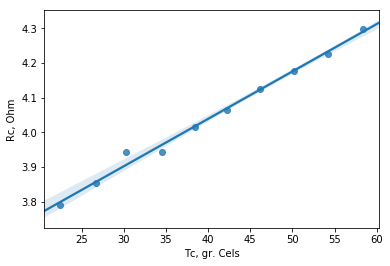

In [4]:
sns.regplot(calibr['Tc, gr. Cels'], calibr['Rc, Ohm']);

Стандартное отклонение:

In [5]:
slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(calibr['Tc, gr. Cels'], calibr['Rc, Ohm'])
print(f'{stderr}')

0.00044113307605694006


## 2. График зависимости $к(t_{ср})$

Графики отличаются масштабом по ординате

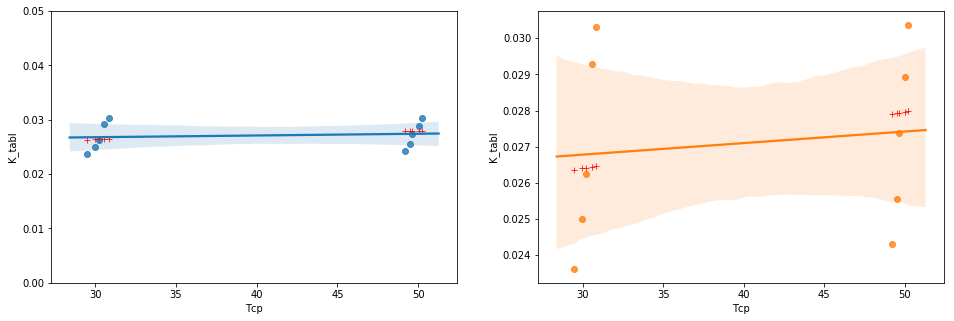

In [6]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(16,5)

for i in range(2):
    sns.regplot(measur['Tcp'], measur['K_exp'], marker='o', ax=ax[i])
    sns.scatterplot(measur['Tcp'], measur['K_tabl'], marker='+', color='red', ax=ax[i])
ax[0].set_ylim(0, 0.05);